In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math 
import os
%matplotlib inline


# Question 6

**Part I**


In [2]:

def histEqualization(img,ret_cdf=False):
    img = img.astype(np.uint8)
    arr,count = np.unique(img,return_counts=True)
    pdf = np.zeros((256,1))    
    len = arr.size
    for i in range(len):
        pdf[arr[i]] = count[i]
    cdf = (np.cumsum(pdf))/img.size
    a = cdf[np.min(arr)]
    out = (255/(1-a))*((cdf[img.flat] - a).reshape(img.shape))
    if ret_cdf:
        return cdf
    else:
        return out.astype(np.uint8)
def histo(im):
    arr=np.zeros(256)
    for i in range(0,256):
        arr[i]=np.count_nonzero(im==i)
    return arr

**Part II**

In [3]:
def histMatching(img,refer):
    im_cdf    = histEqualization(img,ret_cdf=True)
    refer_cdf = histEqualization(refer,ret_cdf=True)    
    cdf       = np.interp(im_cdf,refer_cdf,range(0,256))
    out       = (cdf[img.flat]).reshape(img.shape)
    return out.astype(np.uint8)

**Part III**

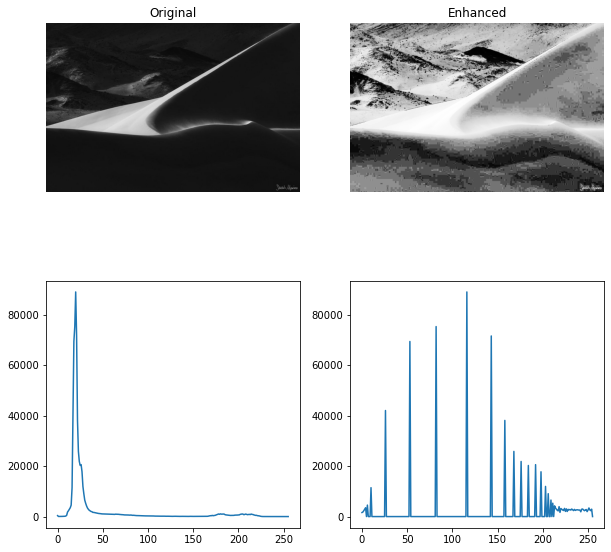

In [4]:
prac_raw = cv2.imread('../images/practice_range1.jpg')
prac = cv2.cvtColor(prac_raw,cv2.COLOR_BGR2GRAY)
prac_heq = histEqualization(prac)
h1 = histo(prac)
h2 = histo(prac_heq)

hist_raw = cv2.imread('../images/hist.jpg')
hist = cv2.cvtColor(hist_raw,cv2.COLOR_BGR2GRAY)
h3 = histo(hist)
hist_heq = histEqualization(hist)
h4 = histo(hist_heq)

fig=plt.figure(figsize=[10,10])
ax = fig.add_subplot(2,2,1)
ax.set_title('Original')
ax.imshow(prac,cmap='gray')
plt.axis('off')

ax = fig.add_subplot(2,2,2)
ax.set_title('Enhanced')
ax.imshow(prac_heq,cmap='gray')
plt.axis('off')

ax = fig.add_subplot(2,2,3)
plt.plot(h1)

ax = fig.add_subplot(2,2,4)
plt.plot(h2)



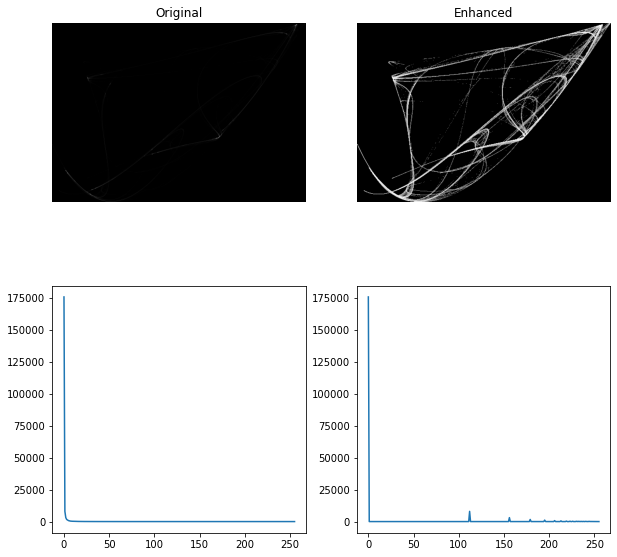

In [5]:
fig=plt.figure(figsize=[10,10])
ax = fig.add_subplot(2,2,1)
ax.set_title('Original')
ax.imshow(hist,cmap='gray')
plt.axis('off')

ax = fig.add_subplot(2,2,2)
ax.set_title('Enhanced')
plt.imshow(hist_heq,cmap='gray',vmin=0,vmax=255)
plt.axis('off')


ax = fig.add_subplot(2,2,3)
plt.plot(h3)

ax = fig.add_subplot(2,2,4)
plt.plot(h4)
plt.show()



**Histogram Equalisation**

> The intensity values of the image is calculated using numpy unique and stored in a array.

>From the array , cdf is calculated by first calculating the cummulative sum and then dividing with the total no.of pixels.

> $ cdf[k] = \frac{\sum_{i=0}^k arr[i]}{No.of pixels}$

> For normalizing the cdf we have to multiply with 255

Then,
>$ 𝑆(𝑟_𝑖)=\sum 𝑝(𝑟_𝑖) $ 

>Here the intensity value $r_i$ is mapped to $s(r_i)$ 

**Part IV**

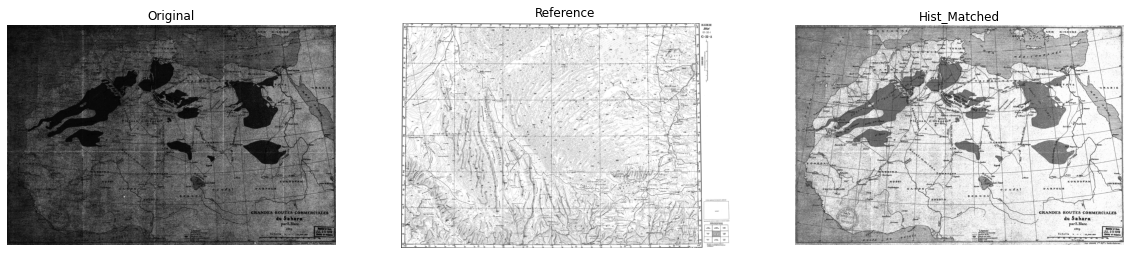

In [6]:
Map_raw = cv2.imread('../images/Map.jpg')
Map = cv2.cvtColor(Map_raw,cv2.COLOR_BGR2GRAY)
h5=histo(Map)
sat_raw = cv2.imread('../images/satellite_img.jpg')
sat = cv2.cvtColor(sat_raw,cv2.COLOR_BGR2GRAY)
out = histMatching(Map,sat)
h6 = histo(out)

fig=plt.figure(figsize=[20,20])
ax = fig.add_subplot(1,3,1)
ax.set_title('Original')
ax.imshow(Map,cmap='gray')
plt.axis('off')

ax = fig.add_subplot(1,3,2)
ax.set_title('Reference')
ax.imshow(sat,cmap='gray')
plt.axis('off')

ax = fig.add_subplot(1,3,3)
ax.set_title('Hist_Matched')
ax.imshow(out,cmap='gray')
plt.axis('off')
plt.show()

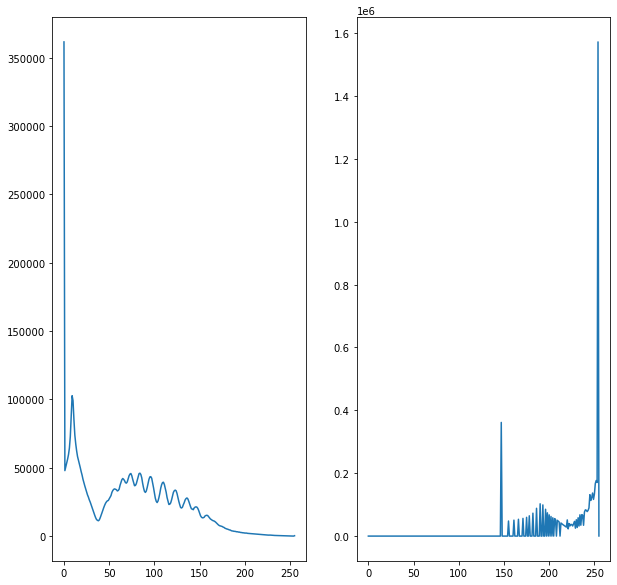

In [7]:
fig=plt.figure(figsize=[10,10])
ax = fig.add_subplot(1,2,1)
plt.plot(h5)

ax = fig.add_subplot(1,2,2)
plt.plot(h6)

# Question 7

**Part I**

In [8]:
def piecewiseLinTransform(img,k1,k2,a,b):
    n_img = k1*img+k2
    n_img[img<a] = 0
    n_img[img>b] = 0
    return n_img

**Part II**

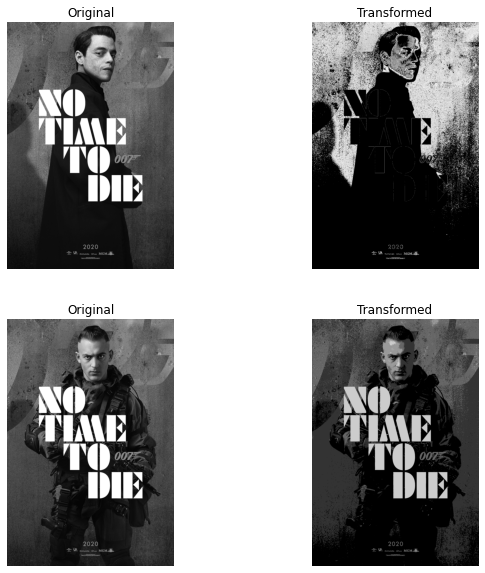

In [9]:
b1_raw = cv2.imread('../images/bondvillain1.jpg')
b1 = cv2.cvtColor(b1_raw,cv2.COLOR_BGR2GRAY)

k1 = np.array([0, 4/3,-2, 0])
k2 = np.array([0, 0.3, 2, 0])
a = np.array([0 , 0.3, 0.6,0.8])
b = np.array([0.3,0.6, 0.8,1])

res_b1 = np.zeros(b1.shape)
for i in range(k1.size):
  out=piecewiseLinTransform(b1/255,k1[i],k2[i],a[i],b[i])
  res_b1=res_b1+out

b2_raw = cv2.imread('../images/bondvillain2.jpg')
b2 = cv2.cvtColor(b2_raw,cv2.COLOR_BGR2GRAY)

k1_2 = np.array([ 0, 0, 0, 0,  0])
k2_2 = np.array([ 0,  0.2,  0.4,  0.6,  0.8 ])
a_2 = np.array([0,0.2,0.4,0.6,0.8])
b_2 = np.array([ 0.2,  0.4, 0.6,  0.8,  1])

res_b2 = np.zeros(b2.shape)
for i in range(k1_2.size):
  out = piecewiseLinTransform(b2/255,k1_2[i],k2_2[i],a_2[i],b_2[i])
  res_b2 = res_b2+out

fig=plt.figure(figsize=[10,10])
ax = fig.add_subplot(2,2,1)
ax.set_title('Original')
ax.imshow(b1,cmap='gray')
plt.axis('off')

ax = fig.add_subplot(2,2,2)
ax.set_title('Transformed')
ax.imshow((res_b1*255).astype(np.uint8),cmap='gray')
plt.axis('off')

ax = fig.add_subplot(2,2,3)
ax.set_title('Original')
ax.imshow(b2,cmap='gray')
plt.axis('off')

ax = fig.add_subplot(2,2,4)
ax.set_title('Transformed')
ax.imshow((res_b2*255).astype(np.uint8),cmap='gray')
plt.axis('off')
plt.show()

> **Image 1**

> Yes, A big difference in two images is found mainly in the text, this is because of the function which we used. The mapping is only in the range [0.3 , 0.8] and the reaminig are set to '0' which made the White text to black(dark) and some dark regions are brightened and some bright regions are darkened. 

> **Image 2**

> According to the observation there isn't a big change in the images, this is because we used a step function which penalises the values to some extent but not totally inverting them , so the text overlay also doesn't have a big difference , here I considered "left continuity" So the white text is a bit darkened i.e, 255 maps to (0.8)*255.

**Part III**

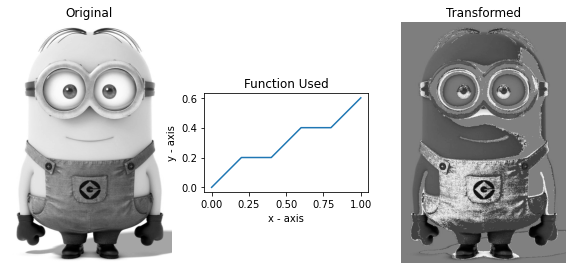

In [10]:
test_raw = cv2.imread('../images/7_3.jpg')
test = cv2.cvtColor(test_raw,cv2.COLOR_BGR2GRAY)

k1 = np.array([1, 0,1, 0,1])
k2 = np.array([0, 0.2, 0.2, 0.4,0.4])
a = np.array([0 , 0.2,0.4, 0.6,0.8])
b = np.array([0.2,0.4, 0.6,0.8,1])

line_x=[0,0.2,0.4,0.6,0.8,1]
line_y= [0,0.2,0.2,0.4,0.4,0.6]
res_test = np.zeros(test.shape)
for i in range(k1.size):
  out=piecewiseLinTransform(test/255,k1[i],k2[i],a[i],b[i])
  res_test=res_test+out

fig=plt.figure(figsize=[10,10])
ax = fig.add_subplot(1,3,1)
ax.set_title('Original')
ax.imshow(test,cmap='gray')
plt.axis('off')


ax = fig.add_subplot(1,3,2)
ax.set_title('Function Used')
plt.plot(line_x, line_y) 
ax.set_aspect('equal', adjustable='box')
plt.xlabel('x - axis') 
plt.ylabel('y - axis') 


ax = fig.add_subplot(1,3,3)
ax.set_title('Transformed')
ax.imshow((res_test*255).astype(np.uint8),cmap='gray')
plt.axis('off')

plt.show()

# Question 8

**Part I**

In [11]:
def gammaTransform(img,gamma):
    out = np.power(img/255,gamma)*255
    return out.astype(np.uint8)

**Part II**

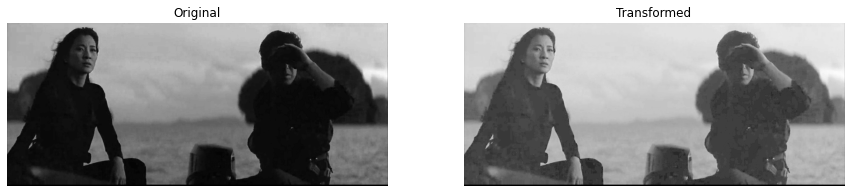

In [12]:
stealth_raw = cv2.imread('../images/stealth.png')
stealth = cv2.cvtColor(stealth_raw,cv2.COLOR_BGR2GRAY)
#p=1
#for i in range(1,52,2):
res = gammaTransform(stealth,0.45)


fig=plt.figure(figsize=[15,15])

ax = fig.add_subplot(1,2,1)
ax.set_title('Original')
ax.imshow(stealth,cmap='gray')
plt.axis('off') 

ax = fig.add_subplot(1,2,2)
ax.set_title('Transformed')
ax.imshow(res,cmap='gray')
plt.axis('off') 
plt.show()

>$ \gamma = 0.45 $

> To increase the image illumination we must choose $ \gamma $ to be '<1' , So I tried many values and $\gamma$ = 0.45 suited the best , This is because in the formula used (img/255) will always be " <1 " ,so $ \gamma $ is inversely proportional to illumination

**Part III**

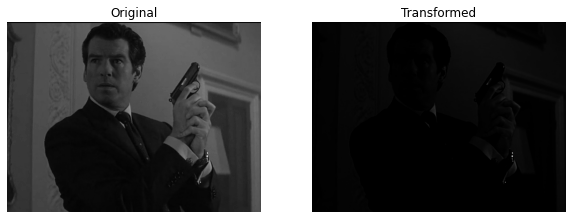

In [13]:
unstealth_raw = cv2.imread('../images/unstealth.png')
unstealth = cv2.cvtColor(unstealth_raw,cv2.COLOR_BGR2GRAY)
res2 = gammaTransform(unstealth,3)

fig=plt.figure(figsize=[10,10])
ax = fig.add_subplot(1,2,1)
ax.set_title('Original')
ax.imshow(unstealth,cmap='gray')
plt.axis('off') 

ax = fig.add_subplot(1,2,2)
ax.set_title('Transformed')
ax.imshow(res2,cmap='gray')
plt.axis('off')

plt.show()


>$ \gamma = 3 $

> To decrease the image illumination we must choose $ \gamma $ to be '>1' , So I tried many values and $\gamma$ = 3 suited the best

**Part IV**

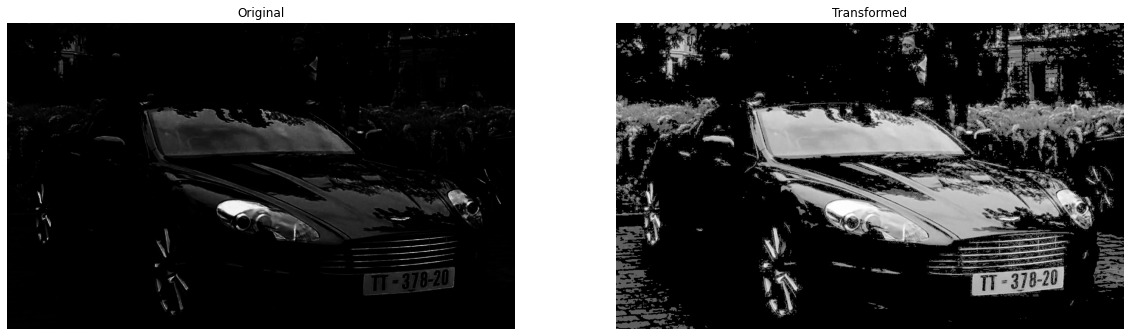

In [14]:
aston_raw = cv2.imread('../images/aston_invisible.jpg')
aston = cv2.cvtColor(aston_raw,cv2.COLOR_BGR2GRAY)
res3 = gammaTransform(aston,0.18)

fig=plt.figure(figsize=[20,20])
ax = fig.add_subplot(1,2,1)
ax.set_title('Original')
ax.imshow(aston,cmap='gray')
plt.axis('off') 

ax = fig.add_subplot(1,2,2)
ax.set_title('Transformed')
ax.imshow(res3,cmap='gray')
plt.axis('off')
plt.show()

# Question 9

In [15]:
j1_raw = cv2.imread('../images/james1.jpg')
j1 = cv2.cvtColor(j1_raw,cv2.COLOR_BGR2GRAY)
j2_raw = cv2.imread('../images/james2.jpg')
j2 = cv2.cvtColor(j2_raw,cv2.COLOR_BGR2GRAY)
j3_raw = cv2.imread('../images/james3.jpg')
j3 = cv2.cvtColor(j3_raw,cv2.COLOR_BGR2GRAY)
j4_raw = cv2.imread('../images/james4.jpg')
j4 = cv2.cvtColor(j4_raw,cv2.COLOR_BGR2GRAY)


a1 = np.concatenate((j1,j2),axis=1)
a2 = np.concatenate((j3,j4),axis=1)
final =np.concatenate((a1,a2),axis=0)

j1_old = histEqualization(j1)
jt = j1_old
jt[j1_old>240] = 200


j2_new = gammaTransform(j2,2)
j3_new = gammaTransform(j3,3)
j4_new = gammaTransform(j4,7)

a_1 = np.concatenate((jt,j2_new),axis=1)
a_2 = np.concatenate((j3_new,j4_new),axis=1)
res =np.concatenate((a_1,a_2),axis=0)


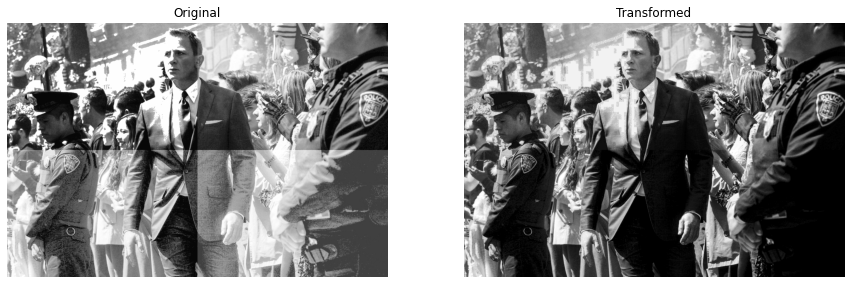

In [16]:

fig=plt.figure(figsize=[15,15])
ax = fig.add_subplot(1,2,1)
ax.set_title('Original')
ax.imshow(final,cmap='gray')
plt.axis('off')

ax = fig.add_subplot(1,2,2)
ax.set_title('Transformed')
ax.imshow(gammaTransform(res,0.8),cmap='gray')
plt.axis('off')
plt.show()